# Exercici 1

> Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

> **Important:**  
Tingues en compte que prèviament et caldrà preparar el dataset.

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# load dataset
fb_thai = pd.read_csv(r"C:\Users\bgarm\Downloads\Curso Ciencia de datos\Activitats\8. Algoritmes d'aprenentatge NO supervisat Agrupació\Publicacions Facebook Thailandia.csv")

fb_thai

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
# Rename columns to a shorter way
fb_thai.columns = ["id", "type", "when", "reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys", "col1", "col2", "col3", "col4"]
fb_thai.head()

,id,type,when,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys,col1,col2,col3,col4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Descripció del dataset

1. Veiem que es tracta d'un dataset amb 16 variables i 7050 registres.
2. És tracte d'un dataset sobre publicacions de facebook a thailandia on podem veure un indentficador de qui ha fet la comentari, el tipus de publicació, el moment de la publicació i les reaccions que ha tingut aquesta publicació.
3. També observem que hi ha 4 columnes que a priori no contenen ningún tipus de informació, és de les primeres coses que comprovarem. 
4. La majoria de les dades son númeriques enterns. Tot i això ens trobem amb 3 columnes que no. Per una banda _id_ que només ens identificar el creador de la publicació, _type_ ens indica el tipus de publicació i _when_ quan es va fer la publicació. Aquestes columnes les podem tractar de la següent manera per poder extreure informació:
    + **id** -> No aporta informació ja que simplement es identificativa. Per tant no treballarem amb ella.
    + **type** -> pot ser interessant veure si hi ha correlacions segons el tipus de publicació, li aplicarem una transofrmació amb one hot encode per convertirla en dummie (binaria).
    + **when** -> ens mostra la data i la hora de publicació. Pot aportar informació rellevant tant la hora de la publicació com el periode de l'any. Per tant la dividirem i ens quedarm en dos columnes: **month** i **day_time** (haurem dividit la hora en quatre moments del día i posteriorment ho convertirem amb dummie també) 
5. També veiem que la columna de reaccions es desglossa en el tipus de reacció (likes, loves, surprises, laughs, sads, angrys).
6. Veiem que a priori **no tenim una variable target definida**, per tant estem davant d'un problema d'**aprenantge NO supervisat**

### Explicació de les variables/columnes que tenim:

1. **id** -> identificació d'usuari (_categorica, objecte_) 
2. **type** -> tipus de publicació (_feature, objecte que haurem de passar a dummie amb un one hot_)
3. **when** -> Moment en que s'ha fet la publicació (_feature, date_)
4. **reacctions** -> Quantitat de reaccions que ha tingut la publicació (_feature, int_)
5. **comments** -> Quantitat de comentaris que ha tingut la publicació (_feature, int_)
6. **shares** -> Quantitat de comparticacions que ha tingut la publicació (_feature, int_)
7. **likes** ->  Quantitat de likes que ha tingut la publicació (_feature, int_)
8. **loves** -> Vegades que s'ha reaccionat a la publicació amb l'emoji del cor (_feature, int_)
9. **surprises** -> Vegades que s'ha reaccionat a la publicació amb l'emoji de surpresa (_feature, int_) 
10. **laughs** ->  Vegades que s'ha reaccionat a la publicació amb l'emoji de riure (_feature, int_)
11. **sads** ->  Vegades que s'ha reaccionat a la publicació amb l'emoji trist (_feature, int_)
12. **angrys** -> Vegades que s'ha reaccionat a la publicació amb l'emoji enfadat (_feature, int_)
13. **col1, col2, col3, col4** -> Sembla que no tenim informació d'aquestes columnes, mirarem més a fons per si les podem eliminar (???)

**El proxim pas és fer una exploració del dataset.**

In [3]:
# check type feature (how many and which are)
print("La columna type te: ", fb_thai['type'].nunique(), "i aquestes son:", fb_thai['type'].unique())

La columna type te:  4 i aquestes son: ['video' 'photo' 'link' 'status']


<AxesSubplot:xlabel='type'>

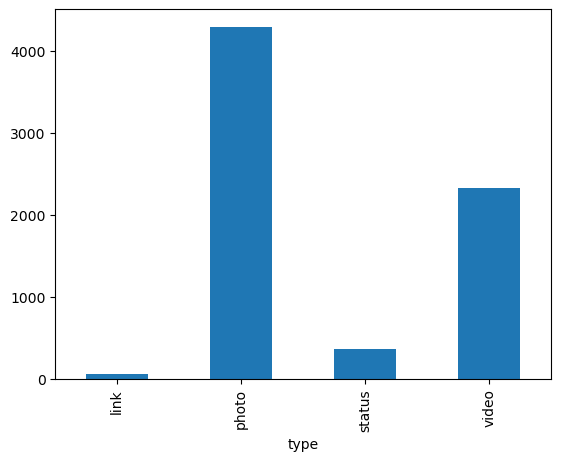

In [4]:
# plot type feature
fb_thai.groupby('type')['id'].count().plot(kind='bar')

_podem comprovar que la majoria de les publicacions son fotos i videos_

In [5]:
# check df info
fb_thai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         7050 non-null   object 
 1   type       7050 non-null   object 
 2   when       7050 non-null   object 
 3   reactions  7050 non-null   int64  
 4   comments   7050 non-null   int64  
 5   shares     7050 non-null   int64  
 6   likes      7050 non-null   int64  
 7   loves      7050 non-null   int64  
 8   surprises  7050 non-null   int64  
 9   laughs     7050 non-null   int64  
 10  sads       7050 non-null   int64  
 11  angrys     7050 non-null   int64  
 12  col1       0 non-null      float64
 13  col2       0 non-null      float64
 14  col3       0 non-null      float64
 15  col4       0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory usage: 881.4+ KB


_podem comprobar que tots els registres en les columnes sense capçalera definida son Nulls o NaNs per tant podem eliminar-les_
També eliminem la columna id ja que és purament identificativa i pel nostre analisis per extreure conclusions no ens interessa. 

In [6]:
# drop columns without data
fb_thai = fb_thai.drop(columns = ["id", "col1", "col2", "col3", "col4"])

# check nulls, NaNs and duplicates
print("\033[1mValors Nulls\033[0m \n", fb_thai.isnull().sum(), "\n")
print("\033[1mValors NaNs\033[0m \n", fb_thai.isna().sum(), "\n")
print("\033[1mValors duplicats\033[0m \n", fb_thai.duplicated().sum())

Valors Nulls 
 type         0
when         0
reactions    0
comments     0
shares       0
likes        0
loves        0
surprises    0
laughs       0
sads         0
angrys       0
dtype: int64 

Valors NaNs 
 type         0
when         0
reactions    0
comments     0
shares       0
likes        0
loves        0
surprises    0
laughs       0
sads         0
angrys       0
dtype: int64 

Valors duplicats 
 54


In [7]:
# check duplicated rows
pd.set_option('display.max_rows', None)
fb_thai.loc[fb_thai.duplicated(keep=False)].sort_values(by = "reactions")

,type,when,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys
3738,photo,7/17/2017 7:11,0,0,0,0,0,0,0,0,0
3739,photo,7/17/2017 7:11,0,0,0,0,0,0,0,0,0
3762,photo,7/10/2017 8:41,0,0,0,0,0,0,0,0,0
3763,photo,7/10/2017 8:41,0,0,0,0,0,0,0,0,0
4047,video,5/27/2018 1:16,0,0,0,0,0,0,0,0,0
4048,video,5/27/2018 1:16,0,0,0,0,0,0,0,0,0
6206,photo,4/2/2018 7:33,75,2,0,71,3,0,1,0,0
6257,photo,4/2/2018 7:33,75,2,0,71,3,0,1,0,0
6211,photo,3/26/2018 1:57,86,5,3,80,2,4,0,0,0
6262,photo,3/26/2018 1:57,86,5,3,80,2,4,0,0,0


In [8]:
# eliminate duplicated values
fb_thai = fb_thai.drop_duplicates()

# check that have been correctly eliminated and the new shape of df
print(fb_thai.duplicated().sum())
print(fb_thai.shape)

0
(6996, 11)


_hem pogut comprobar que no hi havia més NaNs ni nulls, però si hem trobat duplicats. Hem procedit a eliminar-los._

A continuació procedirem a modificar la columna _when_ per transformar-la en dos columnes categoriques: **month** i **day_time**. La columna day_time farem la següent divisió:
   - **inwork** -> Si la publicació s'ha fet entre les 7 i les 17.
   - **outwork** -> Si la publicació s'ha fet després de les 17 i abans de les 23. 
   - **sleepy** -> Si la publicació s'ha fet després de les 23 i abans de les 8.

In [9]:
# import library we will use
from datetime import datetime

# Create columns to split when column into various columns
fb_thai[["date", "hour"]] = fb_thai["when"].str.split(" ", expand=True)
fb_thai[["month", "day", "year"]] = fb_thai["date"].str.split("/", expand=True)

# Change dtype of houe column to a time format
fb_thai["hour"] = pd.to_datetime(fb_thai["hour"], format = "%H:%M").dt.time

# Define a function that returns moment of the day una función que devuelve la franja horaria
def day_time(hour):
    if hour >= datetime.strptime('07:00', '%H:%M').time() and hour <= datetime.strptime('17:00', '%H:%M').time():
        return "inwork"
    elif hour >= datetime.strptime('17:01', '%H:%M').time() and hour <= datetime.strptime('23:00', '%H:%M').time():
        return "outwork"
    else:
        return "sleepy"

# Apply function to a new column
fb_thai['day_time'] = fb_thai['hour'].apply(day_time)

# Eliminate columns we will not use
fb_thai = fb_thai.drop(columns = ["when", "date", "day", "year", "hour"])

In [10]:
# Change column name
fb_thai["month"] = fb_thai["month"].astype("int")
fb_thai["month"] = fb_thai["month"].replace({1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "jun", 7: "jul", 8: "ago", 9: "sep", 10: "oct", 11: "nov", 12: "dec"})

# Reorder columns
fb_thai = fb_thai[["type", "month", "day_time", "reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys"]]

# Show df
pd.set_option('display.max_rows', 10)
fb_thai

,type,month,day_time,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys
0,video,apr,sleepy,529,512,262,432,92,3,1,1,0
1,photo,apr,outwork,150,0,0,150,0,0,0,0,0
2,video,apr,sleepy,227,236,57,204,21,1,1,0,0
3,photo,apr,sleepy,111,0,0,111,0,0,0,0,0
4,photo,apr,sleepy,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,sep,sleepy,89,0,0,89,0,0,0,0,0
7046,photo,sep,inwork,16,0,0,14,1,0,1,0,0
7047,photo,sep,sleepy,2,0,0,1,1,0,0,0,0
7048,photo,sep,sleepy,351,12,22,349,2,0,0,0,0


In [11]:
# Categorical feature summary
fb_thai.describe(include='O').T

,count,unique,top,freq
type,6996,4,photo,4242
month,6996,12,dec,823
day_time,6996,3,sleepy,3772


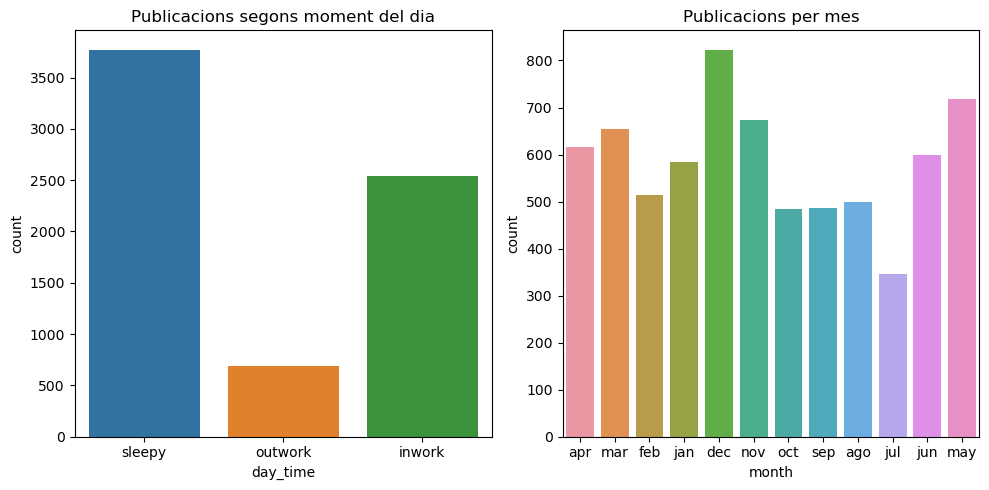

In [12]:
# Create plots for categoric features
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.countplot(x='day_time', data=fb_thai, ax=axs[0])
axs[0].set_title("Publicacions segons moment del dia")

sns.countplot(x='month', data=fb_thai, ax=axs[1])
axs[1].set_title("Publicacions per mes")

plt.tight_layout()
plt.show()

### Exploració variables categoriques
Hem modificat la columna _when_ en dues columnes categoriques per poder veure com es comporta cada _mes_ i cada moment del dia (que hem dividit en 3 tal i com hem explicat anteriorment).  

<u>**Per què hem escollit aquestes variables?**</u>   
Pel que fa al moment del dia, em sembla bastant interessant veure en quin moment del dia s'acostuma a fer les publicacions. Si durant l'horari laboral, fora d'aquest o quan la majoria de la gent està a casa o durmint. 

M'ha semblat bastant interessant veure com es comportaven les publicacions segons el mes, per si l'estació, el clima, periode de vacances m'han semblat factors que podrien influir. M'hagués agradat mirar també si hi havia diferència entre que fos un dia laboral o no, seria una altra variable categoria interessant. 
També hagués pogut veure com s'han comportat cada any però no em sembla un analisi tant interessant aquesta vegada perquè m'interessa veure més com es comportora a partir d'ara i no com s'ha comportat fins ara. És a dir em sembla que l'any que estem pot influir en el nombre de publicacions i reaccions però no influirà en l'any següent. Encara els mesos o si el dia es laborable o no si podem intentar buscar un patró d'estacionalitat. 

<u>**Conclusions**</u>   
Veiem que si hi ha una clara tendència en fer les publicacions en el moment del dia que jo dic sleepy (de 23 a 7). I tenint en compte que la segueix inwork (horari laboral aprox de 7 a 17) trec la conclusió que son els moments en que es te accés a un ordinador. Ja sigui a la feina o desde casa. En canvi, veure que el núm. de publicacions de tarda quan normalment es fan més activatats exteriors o estàs amb més gent el número de publicacions baixa drasticament. 

Respecte els mesos no hi ha una clara tendència. Si que és cert que el mes de Desembre es dispara una mica però podria ser per les festes nadalenques?
També veiem que dels mesos de març a juny si que hi ha una mica més de publicacions. No sé si pot ser causa de l'estació (millor o pitjor clima) que afecta en l'estat anímic de les persones. 
Per contra, veiem que el juliol és el més amb menys publicacions, podria ser un mes considera vacacional i per això hi ha menys interaccions?. 
Podriem investigar a partir d'aquestes suposicions


In [13]:
# statiscal summary
fb_thai.describe().T

,count,mean,std,min,25%,50%,75%,max
reactions,6996.0,225.091052,452.953875,0.0,17.0,58.0,216.00,4710.0
comments,6996.0,225.648799,892.922206,0.0,0.0,4.0,22.25,20990.0
shares,6996.0,40.275872,132.072584,0.0,0.0,0.0,4.00,3424.0
likes,6996.0,210.036735,439.623067,0.0,17.0,57.0,182.00,4710.0
loves,6996.0,12.757004,40.114602,0.0,0.0,0.0,3.00,657.0
surprises,6996.0,1.253431,8.727383,0.0,0.0,0.0,0.00,278.0
laughs,6996.0,0.698256,3.971738,0.0,0.0,0.0,0.00,157.0
sads,6996.0,0.232704,1.481415,0.0,0.0,0.0,0.00,51.0
angrys,6996.0,0.110206,0.688726,0.0,0.0,0.0,0.00,31.0


**Resum estadístic**   
Veiem que les variables tenen valors molt dispersos. Molta diferència entre els quartils (no és un creixement proporcional) i en la majoria dels casos molta diferència entre la mitjà i la mitjana (50%), això ens fa pensar que ens trobarem _outliers_. També comprovem que el valor de la desviació estandard és elevada, un indicatiu més a favor dels outliers. 
També ens serveix per veure en quins valors es mouren les diferents variables númeriques (min i max). Que hi hagi tanta diferencia en aquest cas no ens ha d'extranyar ja que al ser una cosa subjectiva (reaccions) és totalment possible que el minim sigui 0 i el maxim 4710 (per exemple com passa amb els _likes_). En tot cas podriem investigar aquestes publicacions pero no tractar-les com errors. 

Ara que ja hem fet el resum estadístic podem convertir les variables categoriques en dummies per tenir un df on totes les dades siguin númeriques (_int_). 

Fet això procedirem a veure la distribució de les variables númriques (les categoriques convertides en dummies ja sabem que no ens donara distrubució gaussiana) i fer el preprocessat o transformació corresponent a cada variable i, finalment, veurem com es correlacionen entre elles.

In [14]:
# Convert categoric features into dummies
fb_thai_dum = pd.get_dummies(fb_thai, columns = ["type", "month", "day_time"], prefix = "", prefix_sep = "", drop_first = False)

# Show how df results
fb_thai_dum

,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys,link,...,jul,jun,mar,may,nov,oct,sep,inwork,outwork,sleepy
0,529,512,262,432,92,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,227,236,57,204,21,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7046,16,0,0,14,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7048,351,12,22,349,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
# Create a function to see with a hipotesis  -> in this case if its Gaussian shape. 
# Import model from scipy
from scipy import stats
from scipy.stats import shapiro

fb_thai_num = fb_thai[["reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys"]]

# Show the Null hipotesis and the Alternative hipotesis
print("Nul Hipotesis (H0): the sample has a normal distribution (Probably Gaussian).")
print("Alternative Hipotesis (H1): the sample has NOT have a normal distribution (Probably NOT Gaussian).\n")

# Check if it is true the nul hipotesis
for i in fb_thai_num.columns:
    shapiro_test = stats.shapiro(fb_thai_num[i])
    if shapiro_test.pvalue > 0.05:
        print(i, "\nNul hipotesis is accepted, the sample has a normal distribution \033[1m(Probably Gaussian)\033[0m.\n")
    else:
        print(i, "\nNul hipotesis is rejected, the sample has NOT a normal distribution \033[1m(Probably NOT Gaussian)\033[0m.\n")

Nul Hipotesis (H0): the sample has a normal distribution (Probably Gaussian).
Alternative Hipotesis (H1): the sample has NOT have a normal distribution (Probably NOT Gaussian).

reactions 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

comments 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

shares 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

likes 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

loves 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

surprises 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

laughs 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

sads 
Nul hipotesis is rejected, the sample has NOT a normal distribution (Probably NOT Gaussian).

an

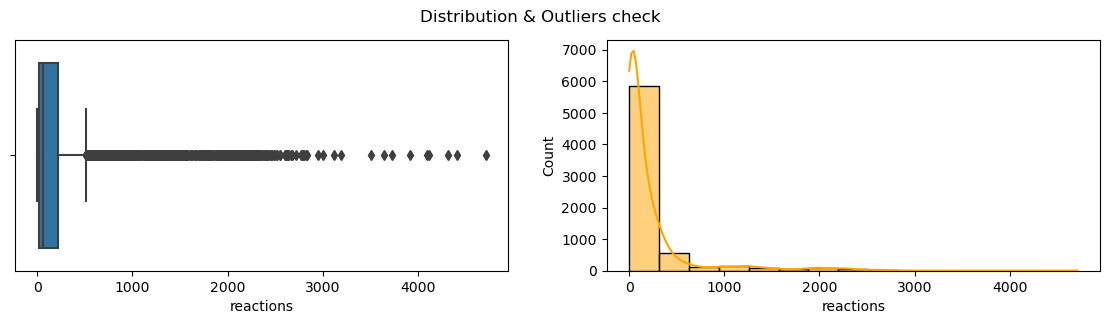

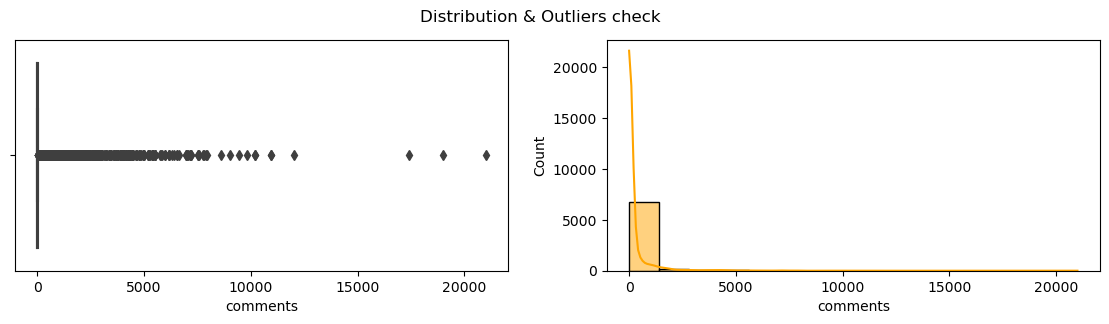

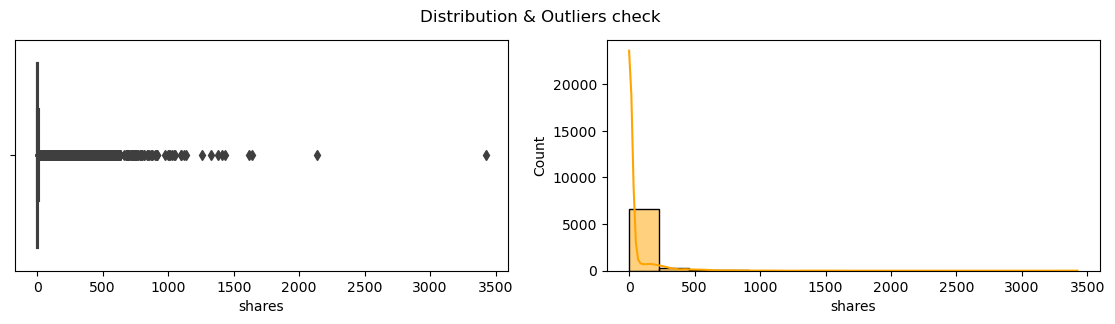

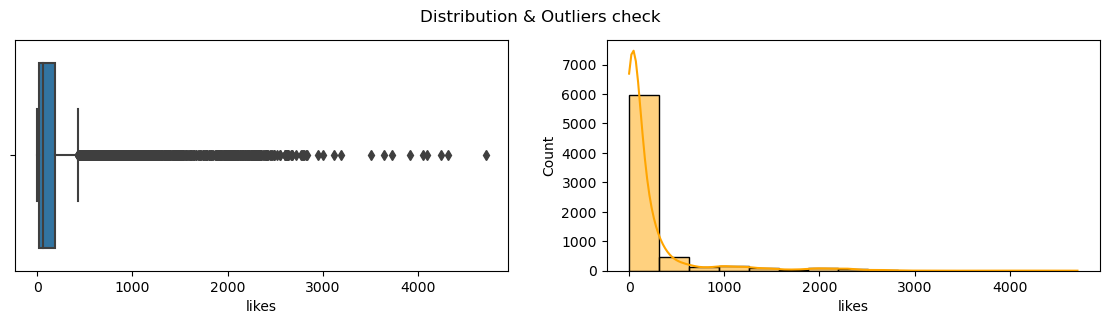

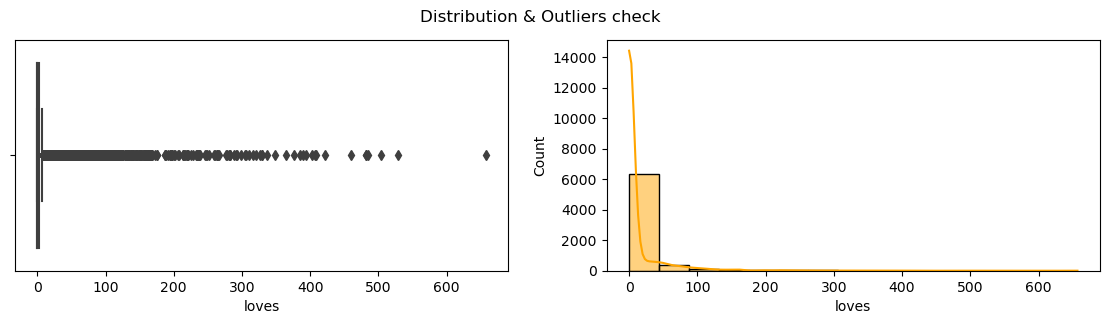

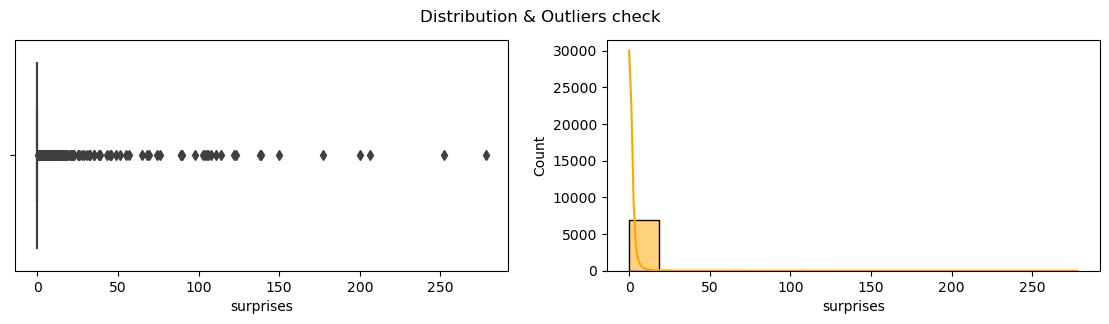

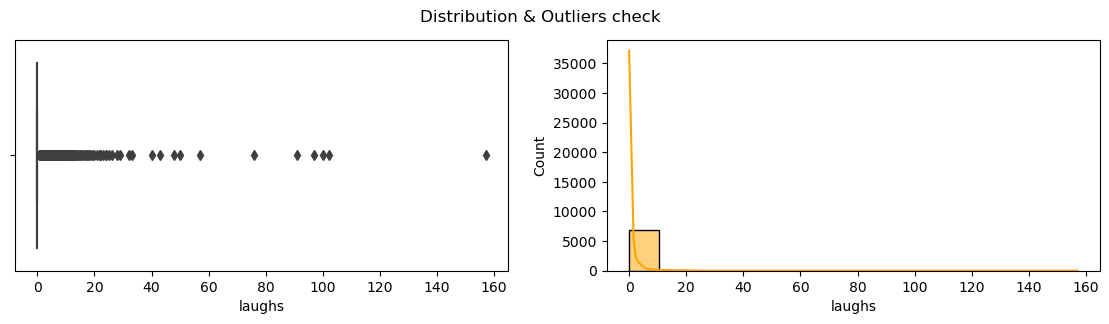

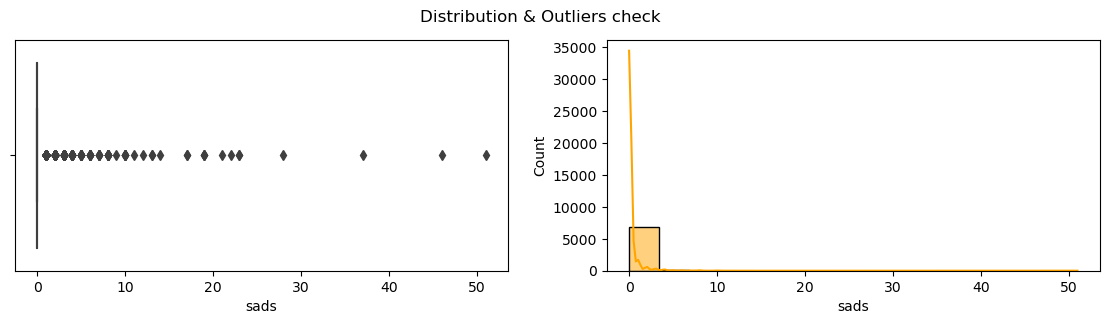

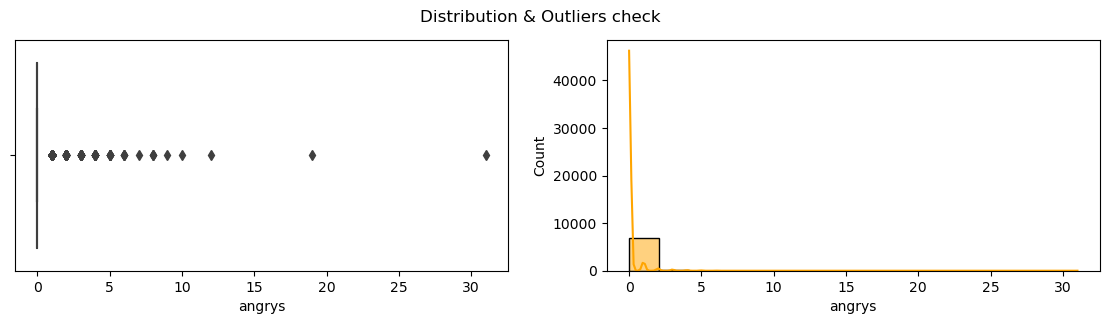

In [16]:
# Plot the distrbution of variables in histograma and boxplot and say it which distrbution has
# Create a iterative function for all the variables
for column in fb_thai_num:
    fig, axes = plt.subplots(1,2, figsize = (14,3))
    fig.suptitle('Distribution & Outliers check')
    sns.histplot(ax=axes[1], data=fb_thai_num, x=fb_thai_num[column], bins=15, color='orange', kde= True)
    sns.boxplot(ax=axes[0], x =fb_thai_num[column])

plt.show()

_Hem pogut comprobar que cap de les variables estudiades te una distribució normal i a més totes presenten outliers, per tant utilitzarem una estandrització, és a dir, **RobustScaler**._

_Recordar que les variables categoriques ja les hem convertit en dummies i per tant ja les tenim escalades entre 0 i 1 i no cal fer cap altre preprocessat_

In [17]:
# Robust Scaler 
Robust_scaler = preprocessing.RobustScaler().fit(fb_thai_dum[["reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys"]])
fb_thai_dum[["reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys"]] = Robust_scaler.transform(fb_thai_dum[["reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys"]])

# Show how is it looks like now df
fb_thai_dum

,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys,link,...,jul,jun,mar,may,nov,oct,sep,inwork,outwork,sleepy
0,2.366834,22.831461,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.462312,-0.179775,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.849246,10.426966,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.266332,-0.179775,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.778894,-0.179775,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.155779,-0.179775,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
7046,-0.211055,-0.179775,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
7047,-0.281407,-0.179775,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
7048,1.472362,0.359551,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1


Text(0.5, 1.0, 'Correlation Heatmap numeric and dummies features')

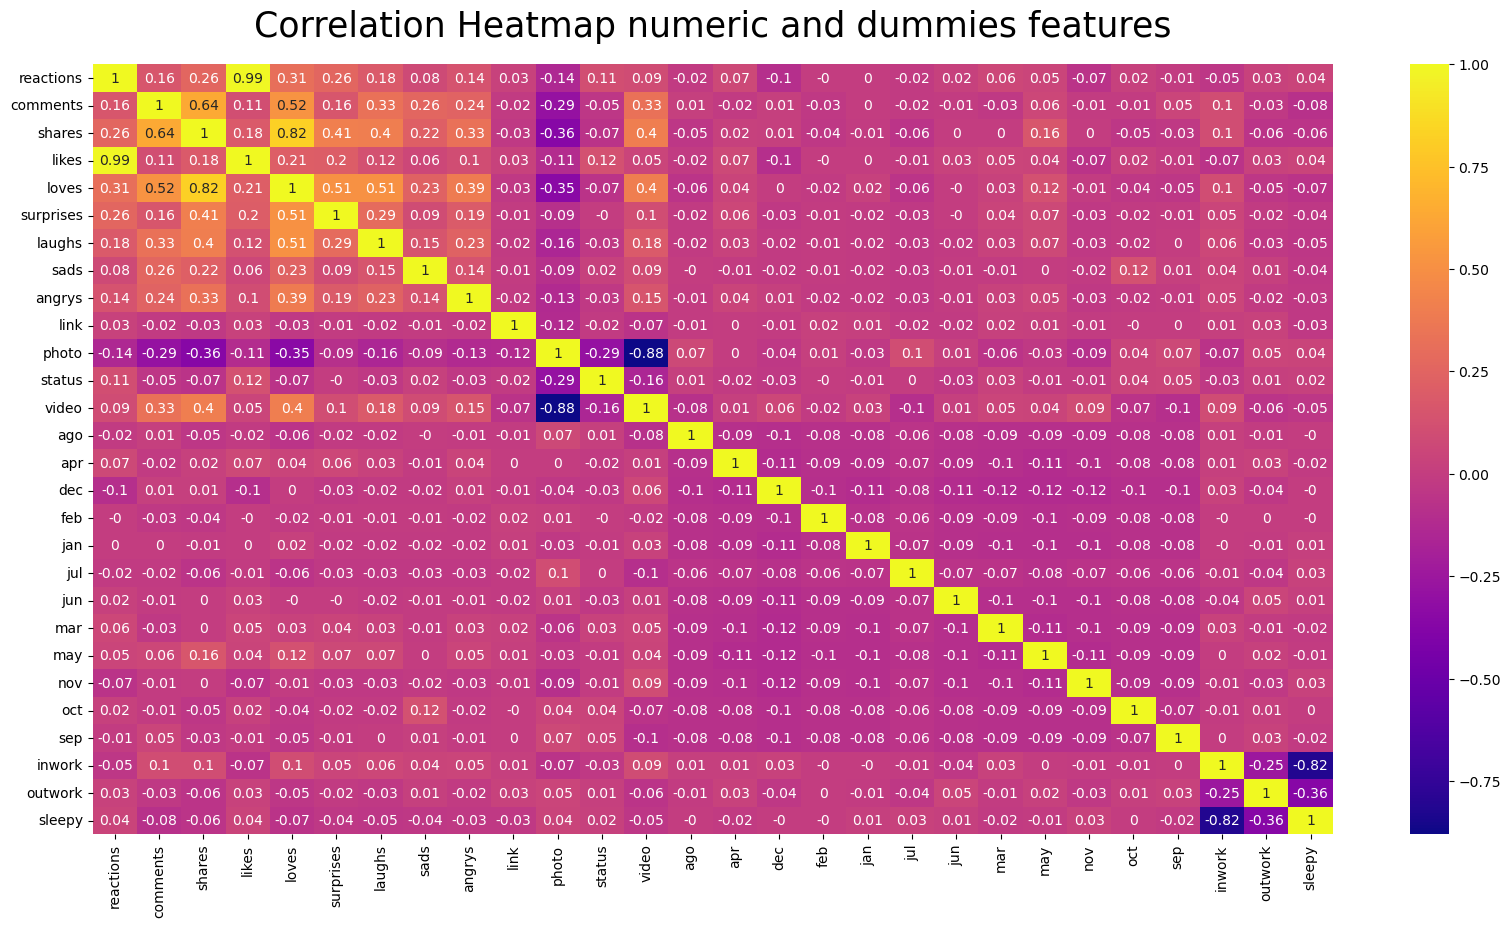

In [18]:
# Correlation heatmap plot
plt.figure(figsize=(20,10))
sns.heatmap(fb_thai_dum.corr().round(2), annot=True, cmap="plasma")
plt.title('Correlation Heatmap numeric and dummies features', fontsize=25, pad=20)

Text(0.5, 1.0, 'Correlation Heatmap only original numeric features')

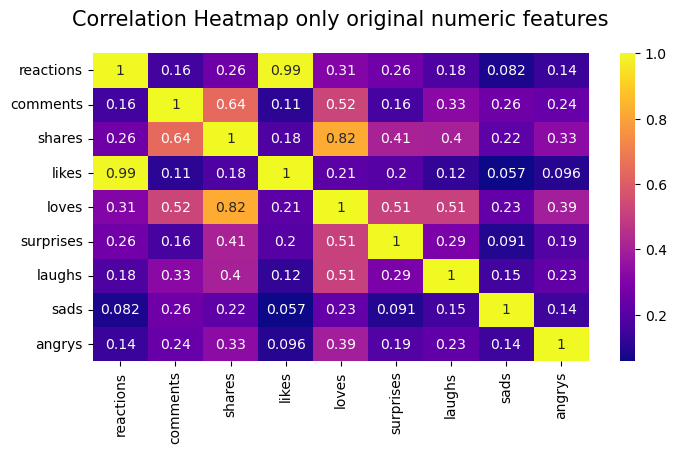

In [19]:
# Correlation heatmap plot
plt.figure(figsize=(8,4))
sns.heatmap(fb_thai_num.corr(), annot=True, cmap="plasma")
plt.title('Correlation Heatmap only original numeric features', fontsize=15, pad=20)

**Correlació entre variables numèriques**
He decidit fer dos heatmaps, un més gran amb totes les variables incluents els dummies i una altra amb només les variables que originalment eren númeriques per veure millor les relacions entre elles.
Pensava trobar-me alguna correlació entre els mesos i les altres variables pero no ha estat així. El que si que he vist és que les variables dummies que procedien de la columna original _type_ si m'han aportat algun tipus de correlació:
    - video i photos amb comments, shares i loves (no son gaire altes pero podem detectar com destaquen pels colors)
També observo que hi ha correlació entre les noves columnes dummies creades a partir de la mateixa en els casos de _type_ i day_time. Em sorpren perquè a priori pensava que no hi hauria correlació (com passa amb els mesos) pero veig que no és el cas. 
També em sorprèn comprovar que la correlació entre elles no és la mateixa, per exemple:
 - video i photos és molt alta, i amb status i link pràcticament nula. 
 - inwork i sleepy és molt alta i aquestes amb outwork és només lleugeremnt. 
 
 Entenc que això passa perquè d'alguna forma tenen algun tipus de relació encara que sigui tan alta en alguns dels casos pot ser perillós i portar-nos problemes de multicolinietat alhora d'utilitzar el model i fer prediccions.
 
 
Per aquest motiu he fet un alter heatmap per veure només la relació entre les variables originalment númeriques i podem fer les següents observacions:
   + hi ha molta correalació entre _reactions_ amb _likes_ -> te certa lògica perquè és la reacció més utilitzada a priori.
   + veiem correlació més lleugera entre _comments_ amb _shares i _loves_ -> també te certa lògica que una publicació comentada tingui més comparticions i loves. 
   + les correlacions amb _shares_ (_comments_, _loves_, _suprises_ i _laughs_) -> ens pot indicar que s'acostuma a compartir més aquelles que desperten més emocions positives que negatives (_sads_, _angrys_)
   + Observem una mica de correlació també entre les reaccions de _angry_ i _love_, a priori emocions oposades però podria ser que son publicacions de critica o queixa sobre alguna cosa que pot comportar consens. Per exemple, un video d'algú rebelant-se contra un actitut machista pot comportar _loves_ cap a la persona que es rebela i a la vegada _angrys_ per l'actitud machista
    
Ara que ja hem fet un analisi inicial del dataset podem començar a explorar-lo i aplicar els models per tal de buscar patrons o clusters. 

Al no tenir moltes dimensionalitats o que la majoria d'aquestes estan convertides a partir del One Hot encoding (transformació de variables categoriques en dummies) farem una comparació de com funcionen els models aplicant la tècnica de reducció de la dimensionalitat PCA (Principal Componen Analysis) o no i veure si aquest cas ha tingut sentit fer-la.

### PCA

Amb la tècnica de PCA el que intentem és reduir la dimensionalitat (o número de variables) del nostra dataset mantenint el màxim d'informació possible per tal de reduïr el soroll que hi ha en les dades i facilitar la trovalla de patrons quan apliquem els models. Això ho fem a través de dos principals conceptes:
   + **La variança acumulada explicada** -> Ve a ser la suma de la variança de totes les variables.
   + **Principal Components** -> venen a ser les noves variables que contenen la major informació del nostra dataset. 

Text(0.5, 1.0, 'Discover number of PCA components')

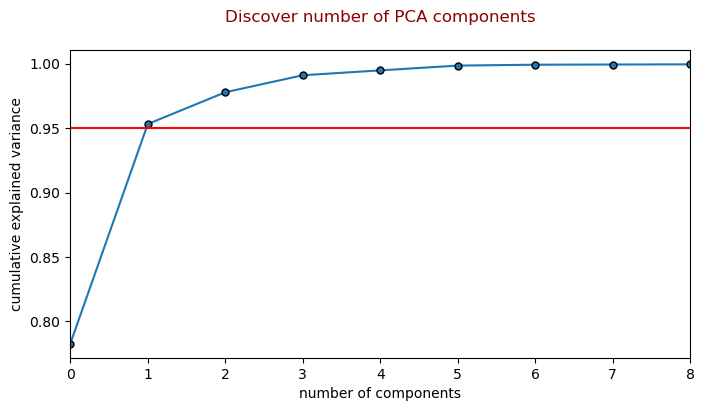

In [20]:
# import libraries to apply PCA method
from sklearn.decomposition import PCA

# Create a plot to see how many PC will be optim to use
pca = PCA().fit(fb_thai_dum)
plt.figure(figsize = (8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o", markersize=5, markeredgecolor='black')
plt.axhline(0.95, color = "r", linestyle = "-")
plt.xlim([0, 8])
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance");
plt.title("Discover number of PCA components", fontsize=12, pad=20, color='darkred')

In [21]:
# Call pca method with n_components = 3 and fit it
pca = PCA(n_components=3)
pca.fit(fb_thai_dum)

# Show % of the cumulative explained variancec we will keep with 2 PC. 
np.cumsum(pca.explained_variance_ratio_)

array([0.78268529, 0.95318936, 0.97784069])

_el resultat de la matriu anterior ens indica quin % de informació cada PC reté de les dades originals recullides en la cumulative explained variance_ Per tant podem comprovar que amb **n_components = 2** és suficient ja que així supera el 95% de la informació recollida que es la marca estandard. Un major número de PCs ens aportaria més precisió pero ens podria allargar innecessariament la complexitat dels models a utilitzar alhora de buscar patrons_

In [22]:
# Call again pca method as we finally use only 2 PC
pca = PCA(n_components=2)
pca.fit(fb_thai_dum)

# fit and transform our dataset with PCA info
fb_thai_pca = pd.DataFrame(pca.transform(fb_thai_dum), columns=["PC1", "PC2"], index=fb_thai_dum.index)

# Show the result of the new dataframe with nearly all the original data. 
fb_thai_pca.head(10)

,PC1,PC2
0,48.361170,38.958431
1,-14.811866,-2.188976
2,3.394179,3.415049
3,-14.816557,-2.194868
4,-14.200026,-1.346422
5,-14.203417,-1.734745
6,22.685101,1.375072
7,11.125606,-2.386985
8,-14.435409,-1.745748
9,-14.146077,-1.984104


### K-Means

1. Utilitzarem un gràfic del mètode del colze per saber quin és el valor optim de número de clusters (k) pel nostre model. Aquest punt és aquell del gràfic o veiem una inflexió on afegir més número de clusters no ens soposa una gran millora. 

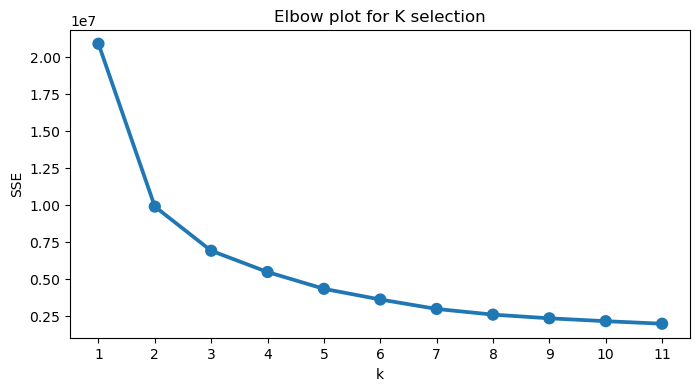

In [23]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

def elbow_plot(df):
    """Create elbow plot from normalized data"""
    sse = {}
    sse_r = []
    for k in range(1, 12):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(fb_thai_dum)
        sse[k] = kmeans.inertia_
        sse_r.append(kmeans.inertia_)
    
    plt.figure(figsize = (8, 4))
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()
    return sse_r

sse = elbow_plot(fb_thai_pca)

In [24]:
# apply kneelocator to know where is the elbow dot (whinch we have to assign to k)
kl = KneeLocator(range(1, 12), sse, curve="convex", direction="decreasing")
kl.elbow

3

_Amb el gràfic ja podiem intuir que el valor de k debia d'estar entre 3, 4 o 5 ja que a partir de llavors la corba decreix molt lentament_ Recordem que si tenim masses clusters podem correr el risc de caure en overfitting quan ho apliquem al model_

In [25]:
# Call and fit the model with 3 clusters
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(fb_thai_pca)

KMeans(n_clusters=3, random_state=1)

In [26]:
# Predict to assign each 
y_pred = k_means.predict(fb_thai_pca)
y_pred

array([2, 0, 0, ..., 0, 0, 0])

In [27]:
# Create new column with the cluster assgined for each instance
fb_thai['cluster'] = y_pred

#Show first rows
fb_thai.head()

,type,month,day_time,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys,cluster
0,video,apr,sleepy,529,512,262,432,92,3,1,1,0,2
1,photo,apr,outwork,150,0,0,150,0,0,0,0,0,0
2,video,apr,sleepy,227,236,57,204,21,1,1,0,0,0
3,photo,apr,sleepy,111,0,0,111,0,0,0,0,0,0
4,photo,apr,sleepy,213,0,0,204,9,0,0,0,0,0


_finalment veiem com s'ha afegit correctament la columna cluster al nostra data set_
Ara anem a veure com es comporta cada cluster per cada variable

### Visualitzacions

Per veure com es comporta agafem el dataframe original (sense escalar ni dummificar) i crearem una funció que iteri només sobre les variables númeriques)

In [28]:
# check that are the columns we want to use
fb_thai.columns[3:-1]

Index(['reactions', 'comments', 'shares', 'likes', 'loves', 'surprises',
       'laughs', 'sads', 'angrys'],
      dtype='object')

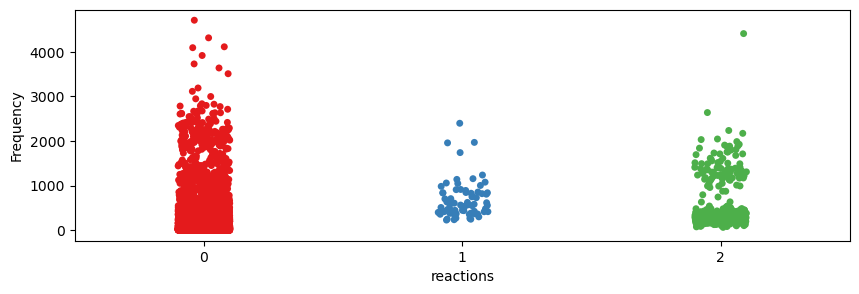

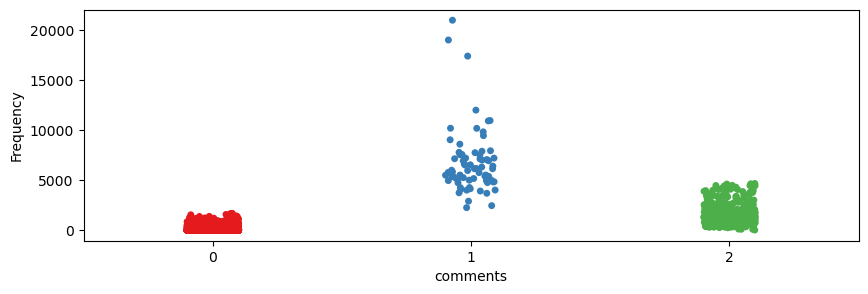

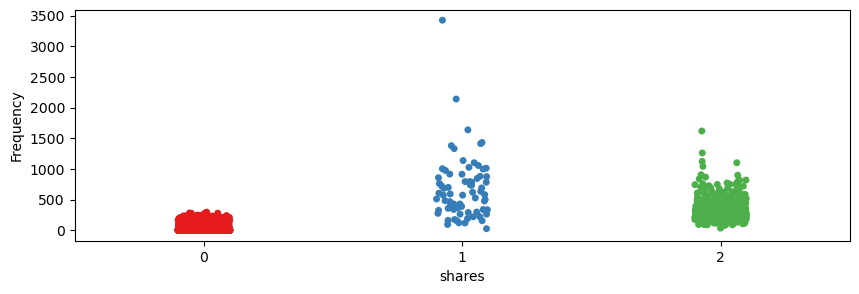

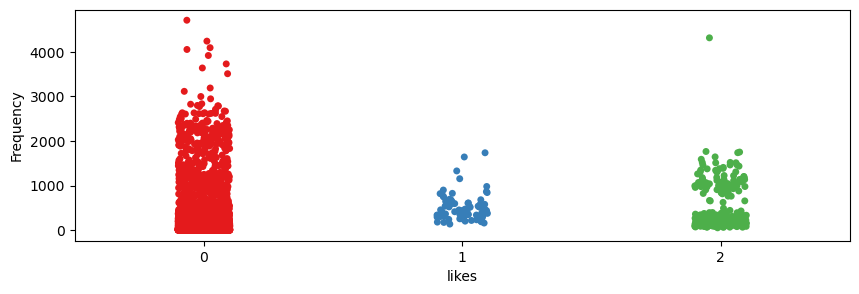

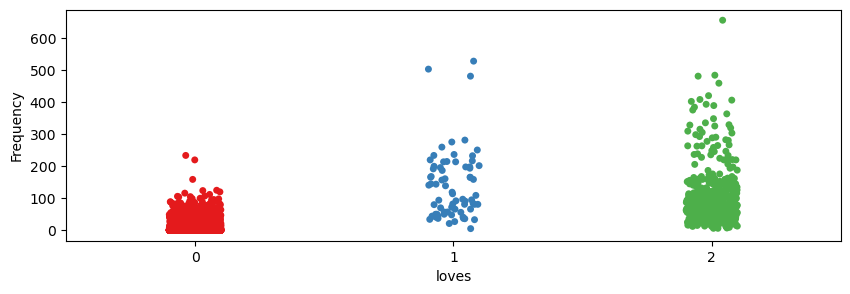

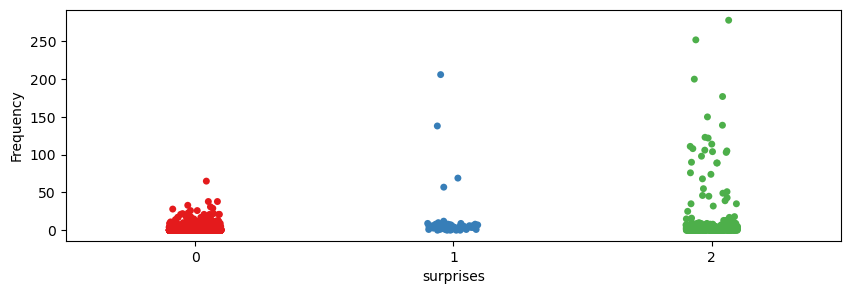

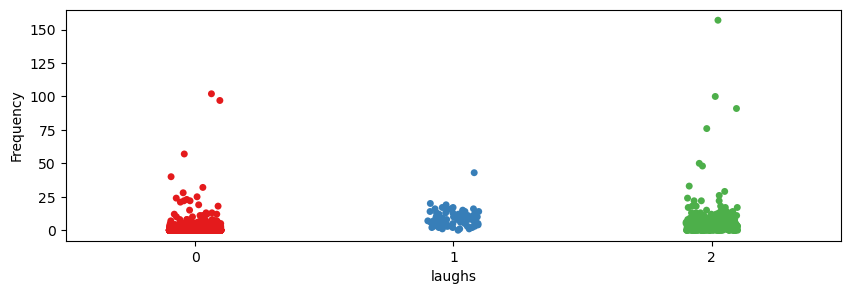

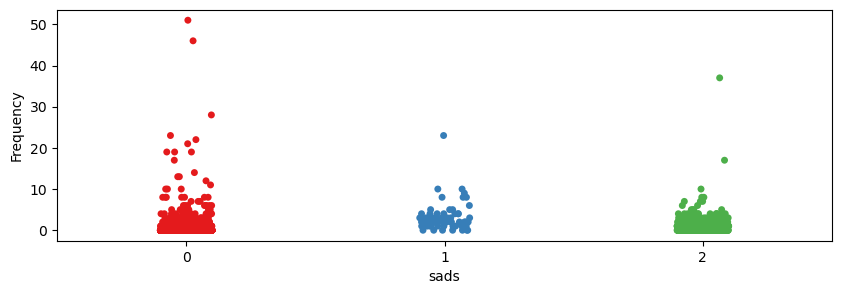

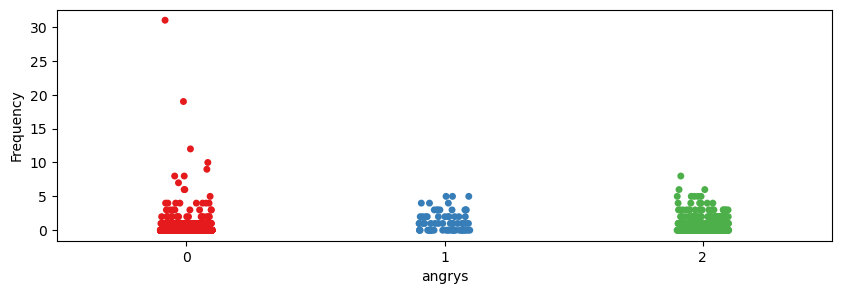

In [29]:
# create a new variable that will iterate for our function to see plots
columns = fb_thai.columns[3:-1]

# plot    
for i in columns:
    plt.figure(figsize=(10,3))
    plt.tight_layout()
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.stripplot(x="cluster", y=i, data=fb_thai, palette=sns.color_palette("Set1", len(fb_thai[i].unique())))
    

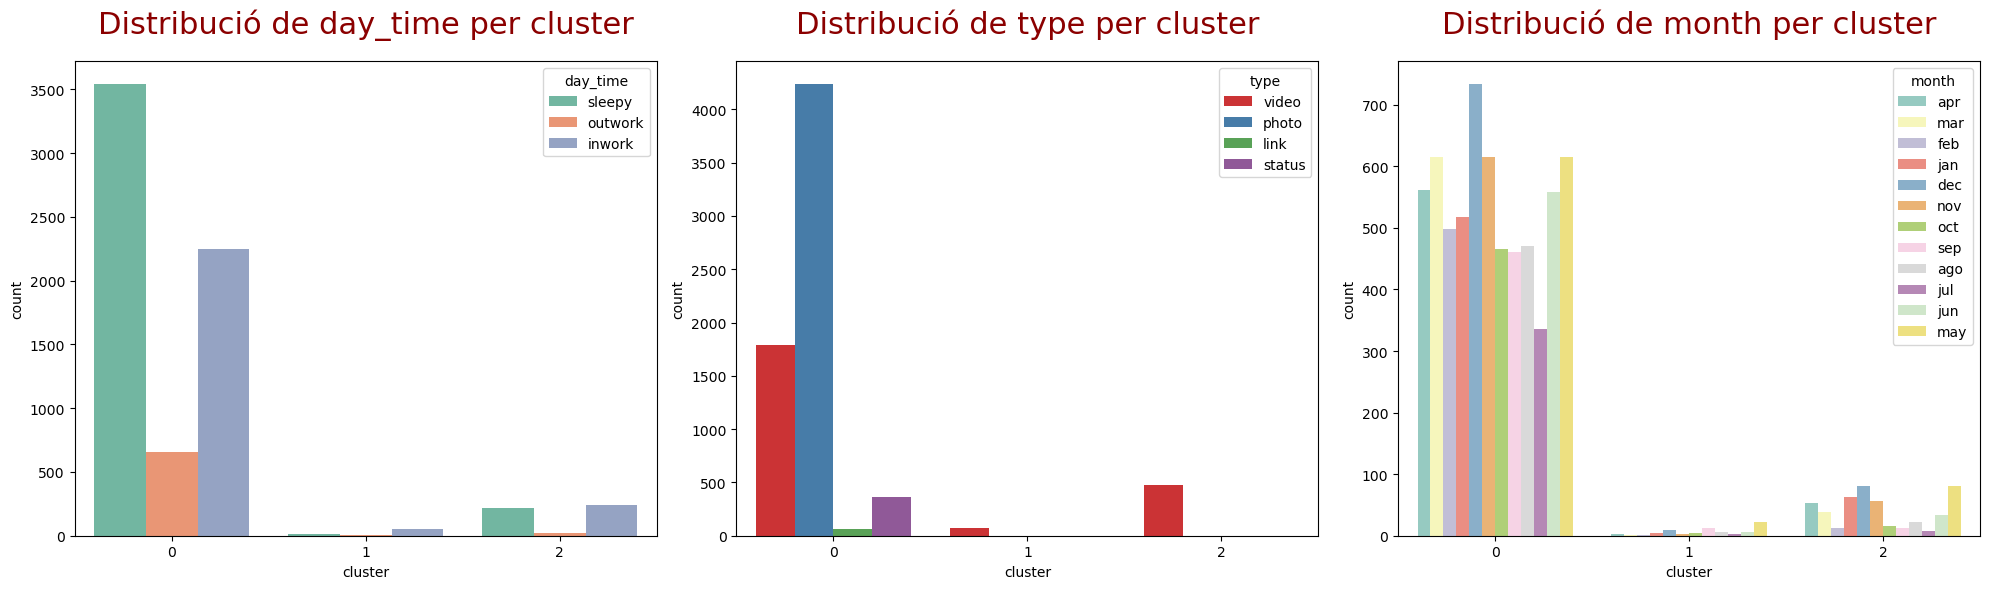

In [42]:
#plot comparision of confusion matrix with heatmap
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.countplot(x="cluster", hue="day_time", data=fb_thai, palette="Set2", ax=axes[0])
sns.countplot(x="cluster", hue="type", data=fb_thai, palette="Set1", ax=axes[1])
sns.countplot(x="cluster", hue="month", data=fb_thai, palette="Set3", ax = axes[2])

# title of each heatmap
axes[0].set_title("Distribució de day_time per cluster", fontsize=22, pad=20, color='darkred')
axes[1].set_title("Distribució de type per cluster", fontsize=22, pad=20, color='darkred')
axes[2].set_title("Distribució de month per cluster", fontsize=22, pad=20, color='darkred')

# Adjust space beetwen subplots
fig.tight_layout()


Text(0.5, 1.0, 'Distribució de les dades en clusters en el PC2')

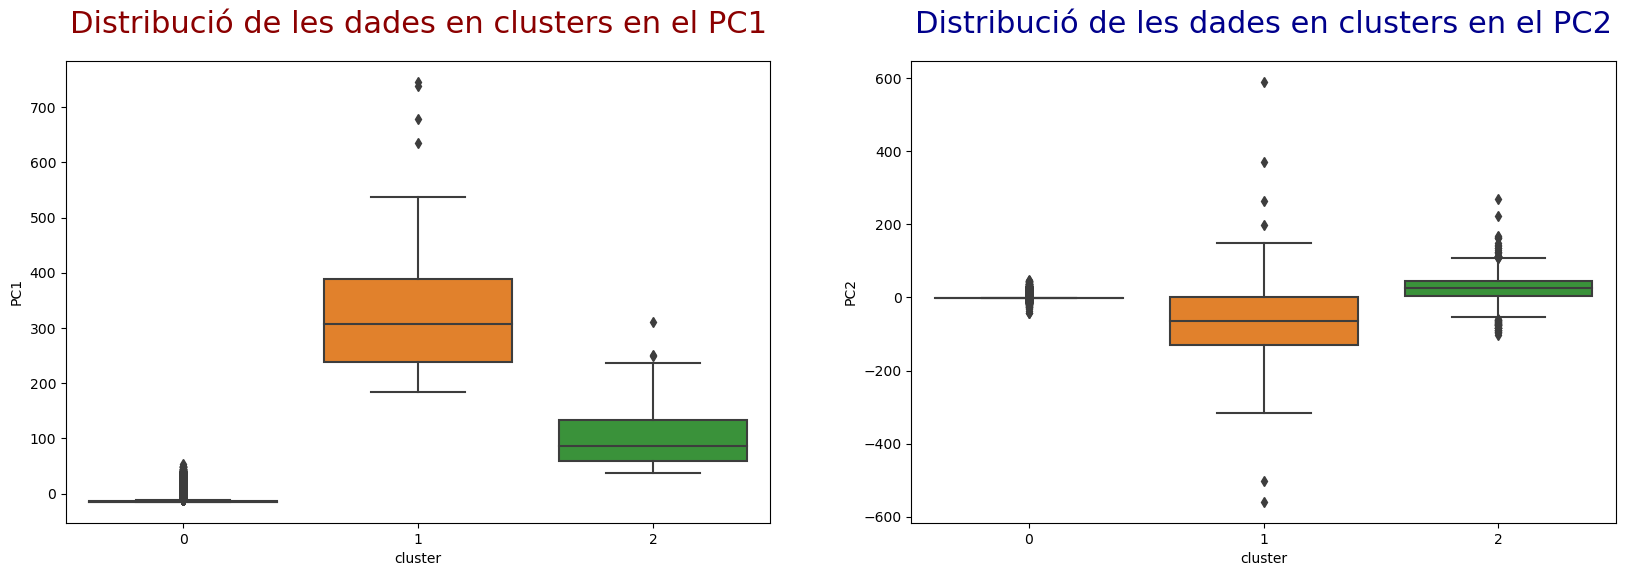

In [41]:
fb_thai[["PC1", "PC2"]] = fb_thai_pca

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(x='cluster', y="PC1", data=fb_thai, ax=axes[0])
sns.boxplot(x='cluster', y="PC2", data=fb_thai, ax=axes[1])

axes[0].set_title("Distribució de les dades en clusters en el PC1", fontsize=22, pad=20, color='darkred')
axes[1].set_title("Distribució de les dades en clusters en el PC2", fontsize=22, pad=20, color='darkblue')

**Conclusió K-Means**

<u>Númeriques</u>
1. **reactions** -> veiem que el cluster 0 és el predominant amb molta densitat de data seguit del 2. Aquesta densitat ens indica que te molta densitat. Veiem que els 3 clusters tenen algún outlier encara que en el cluster 2 és el que te un punt amb més distancia respecte la resta i el 0 el que te més outliers encara que també es el que te més densitat. A més en el cluster 0 te una densitat bastant repartida entre 0 i fins quasi a 3000 reaccions, mentre els altres dos clusters es queden bastant més abaix (sobre els 1000)  
2. **comments** -> veiem que el cluster 2 és el predominant i els punts estan distribuits d'una forma semblant, el mateix passa amb el cluster 0, arribant a una frequencia més baixa però amb molta densitat de data. Aquests dos clusters no presenten outliers, en canvi, el cluster 1 son punts molt dispersos entre ells i amb poca densitat, si que identifiquem outliers en aquest cluster. 
3. **shares** -> els clusters es comporten d'una manera molt similar als comentaris (podrien estar correlacionades?). També veiem que la dispersió en el cluster 1 encara és mes evident, on trobem un outlier molt allunyat de la resta. Aquí si que identifiquem alguns outliers en el cluster 2, que torna a ser el predominant. 
4. **likes** -> veiem una distribució de la data bastant similar a reactions. Ja hem dit al principi que estaven correlacionades per tant no és d'extranyar que tinguin una classificació similar. Veiem una gran quantitat de la data en el cluster 0. Tots presenten outliers, encara que sopren un sol outlier molt allunyat en el cluster 2. 
5. **loves** -> veiem aquí de nou que el cluster 2 és el predominant el cual presenta uns quants outliers amb bastants outliers i amb el punt més alt i allunyat. El cluster 0 te una frequencia de loves baixa però molt densa amb algun outlier, i el cluster 1 torna a tenir els punts bastants dispersos sense tenir una densitat alta, amb 3 outliers que sobresurten
6. **surprises** -> no te moltes observacions pero estan bastant equilibrats. Veiem una alta densitat en els punts més baixos per tots els clusters. el cluster 0 sembla que concentra una mica més de data i els punts estant més junts entre ells sense que els outliers s'allunyin gaire a diferencia del cluster 2 que si molts outliers i molt dispersos i allunyats d'on es concentra la majoria. El cluster 1 te 4 punts molt allunyats de la resta però com hem dit la majoria es concentra en els punts més baixos.
7. **laughs** -> El cluster 2 és el predominant però tenim pocs punts en comparació amb altres features. Els 3 clusters presenten la majoria de la data en el mateix tram (principi) amb alguns outliers en el 0 i 2 bastant allunyats de la majoria, en canvi el cluster 1 només presenta un outlier i no gaire allunyat.  
8. **sads** -> veiem que predomina lleugerament el cluster 0. Tampoc tenim molta data. El segueix d'aprop el cluster 2. Tots presenten outliers i la majoria de la data en la mateixa freqüencia.
9. **agrys** -> pot sembla que te una distribució similar pero hi ha petites diferències. Sembla que aquí predomina el cluster 2 i podriem dir que l'unic que presenta outliers es el cluster 0. 

<u>Categoriques</u>
1. **day_time** -> veiem que la majoria de la data es recull en el cluster 0 amb molta diferència amb una distribució similar a la que hem vist durant la exploració del dataset. En el cluster 1 hi ha molt poques observacions però predomina el moment del día en que considerem laboral (inwork). En aquest cluster no hi ha representació de outwork. En el cluster 2 veiem que la repartació de la dada és molt semblant entre inwork i sleepy i una lleguera representació de outwork. 

2. **type** -> cluster 0 tornar a tenir una forma molt similar a la que hem vist durant la exploració de la data i també recull la major part de la data amb molta diferència. El cluster 1 i 2 només tenen representació de video. Crida l'atenció. 

3. **month** -> Un cop més passa que el cluster 0 agrupa la majoria de la data mantenint una distribució molt similar a la feta durant la exploració. En cluster 1, un altre cop amb menys representació falten alguns mesos i el cluster 2, tot i ser més baixa i equilibrada la data hi ha diferencies a simple vista amb el cluster 0.

Podriem dir que el cluster 0 recull la gran majoria de les dades a més d'una forma molt similar a la que hem vist durant l'exploració del dataset. 

Podem dir que més enllà de la classificació i identificar outliers també ens pot ajudar a indentificar correlacions entre features al tenir una forma similar de la distribució de la data en els tres clusters :).

# Exercici 2

> Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

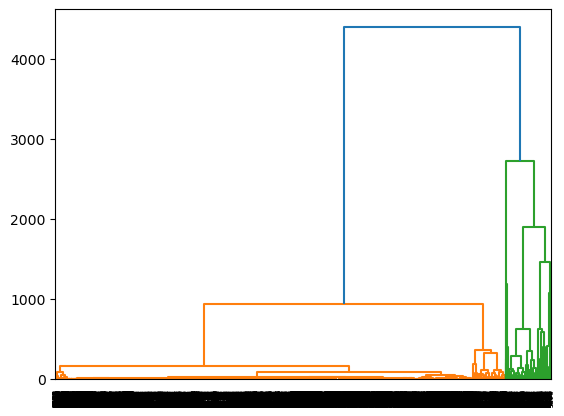

In [32]:
# import libraris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# plot dendrograma to identify how many clusters will use
dendrogram = sch.dendrogram(sch.linkage(fb_thai_pca, method='ward'))

_la major distancia vertical que no instersecciona amb cap cluster és la de color verd, que per tant ens confirma que el número de clusters que hem d'utilitzar és igual a 4_

In [33]:
# create and fit model, see the clusters results for each instance
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(fb_thai_pca)
labels = model.labels_
labels

array([3, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
# Create new column with the cluster assgined for each instance
fb_thai["cluster_agglo"] = labels

fb_thai = fb_thai[["type", "month", "day_time", "reactions", "comments", "shares", "likes", "loves", "surprises", "laughs", "sads", "angrys", "PC1", "PC2", "cluster", "cluster_agglo"]]

#Show first rows
fb_thai.head()

,type,month,day_time,reactions,comments,shares,likes,loves,surprises,laughs,sads,angrys,PC1,PC2,cluster,cluster_agglo
0,video,apr,sleepy,529,512,262,432,92,3,1,1,0,48.361170,38.958431,2,3
1,photo,apr,outwork,150,0,0,150,0,0,0,0,0,-14.811866,-2.188976,0,1
2,video,apr,sleepy,227,236,57,204,21,1,1,0,0,3.394179,3.415049,0,1
3,photo,apr,sleepy,111,0,0,111,0,0,0,0,0,-14.816557,-2.194868,0,1
4,photo,apr,sleepy,213,0,0,204,9,0,0,0,0,-14.200026,-1.346422,0,1


_a diferencia del KMeans, agglomerative clustering ens ha dit que la millor forma per classificar similituds de la data és en 4 cluster, hem afegit el nostra dataset netejat una nova columna podem passar a veure com es comporten les diferents variables_

### Visualitzacions

In [35]:
fb_thai.columns[3:-4]

Index(['reactions', 'comments', 'shares', 'likes', 'loves', 'surprises',
       'laughs', 'sads', 'angrys'],
      dtype='object')

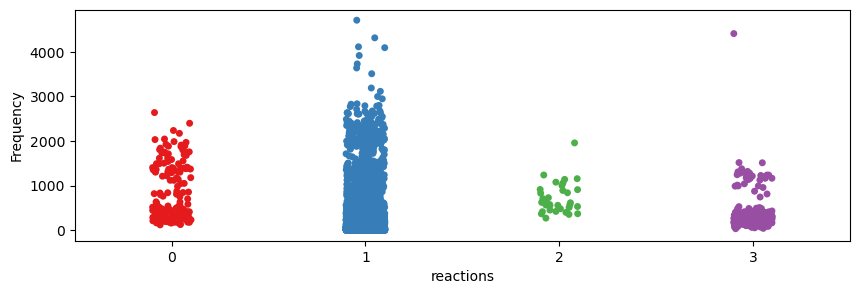

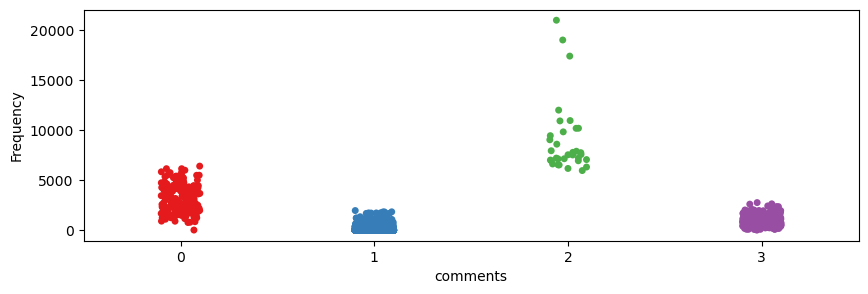

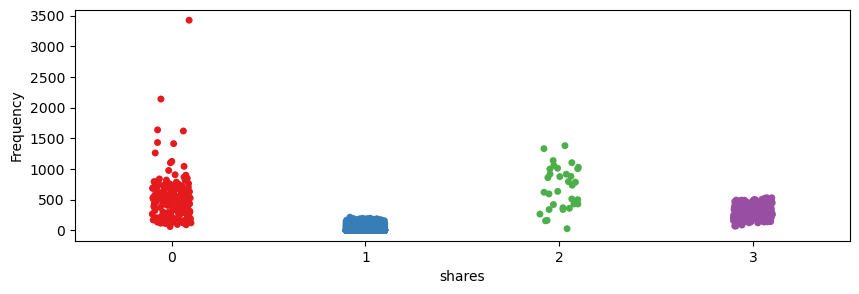

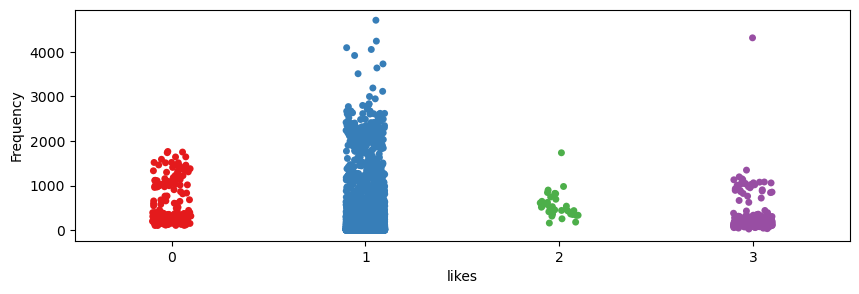

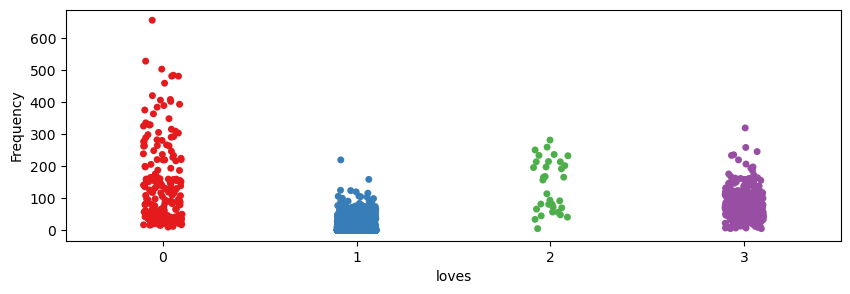

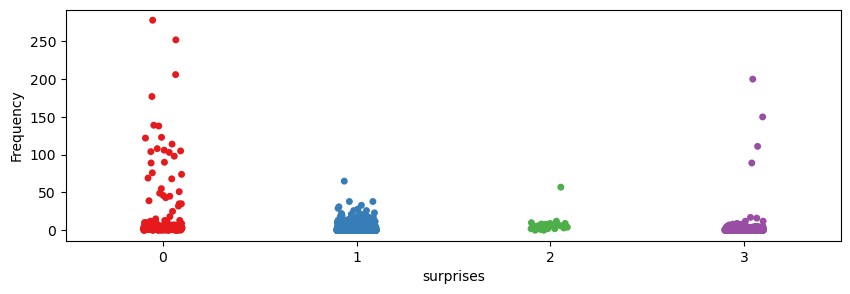

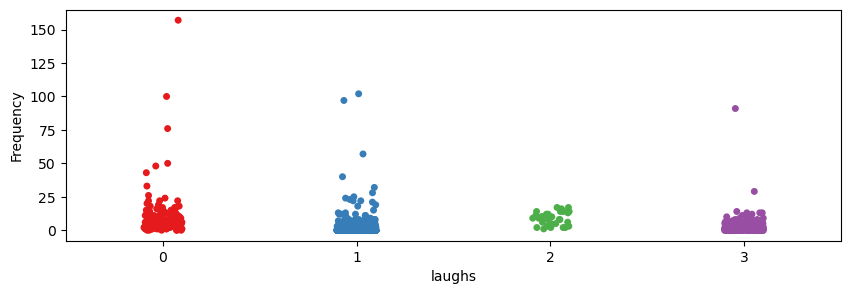

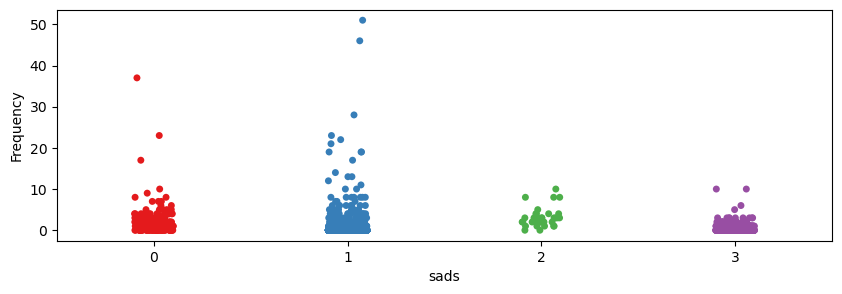

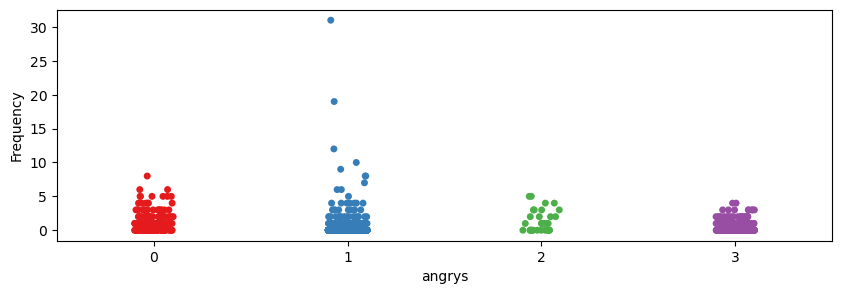

In [36]:
# create a new variable that will iterate for our function to see plots
columns = fb_thai.columns[3:-4]

# plots    
for i in columns:
    plt.figure(figsize=(10,3))
    plt.tight_layout()
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.stripplot(x="cluster_agglo", y=i, data=fb_thai, palette=sns.color_palette("Set1", len(fb_thai[i].unique())))

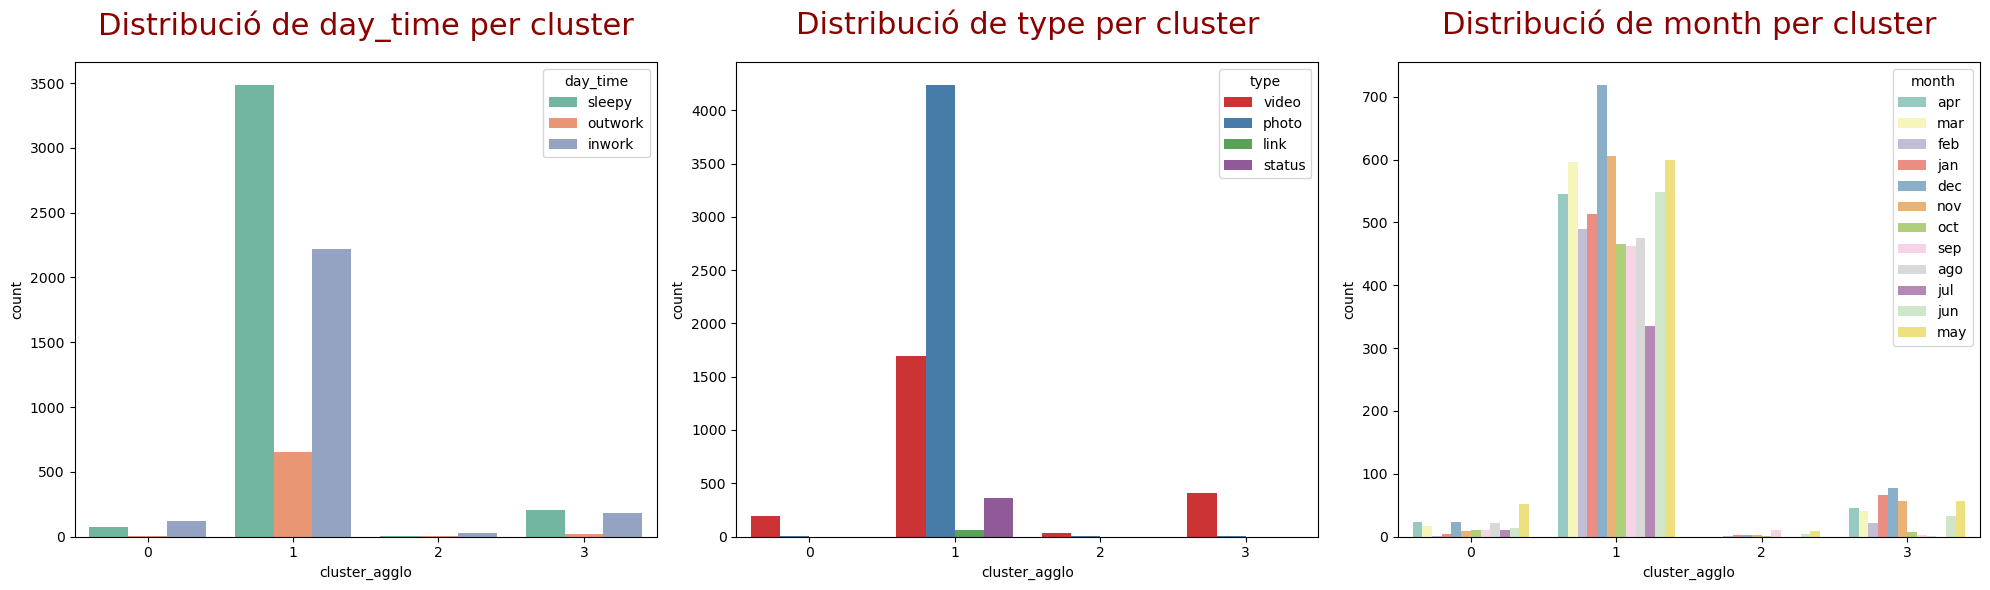

In [37]:
#plot comparision of confusion matrix with heatmap
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.countplot(x="cluster_agglo", hue="day_time", data=fb_thai, palette="Set2", ax=axes[0])
sns.countplot(x="cluster_agglo", hue="type", data=fb_thai, palette="Set1", ax=axes[1])
sns.countplot(x="cluster_agglo", hue="month", data=fb_thai, palette="Set3", ax = axes[2])

# title of each heatmap
axes[0].set_title("Distribució de day_time per cluster", fontsize=22, pad=20, color='darkred')
axes[1].set_title("Distribució de type per cluster", fontsize=22, pad=20, color='darkred')
axes[2].set_title("Distribució de month per cluster", fontsize=22, pad=20, color='darkred')

# Adjust space beetwen subplots
fig.tight_layout()

Text(0.5, 1.0, 'Distribució de les dades en clusters en el PC2')

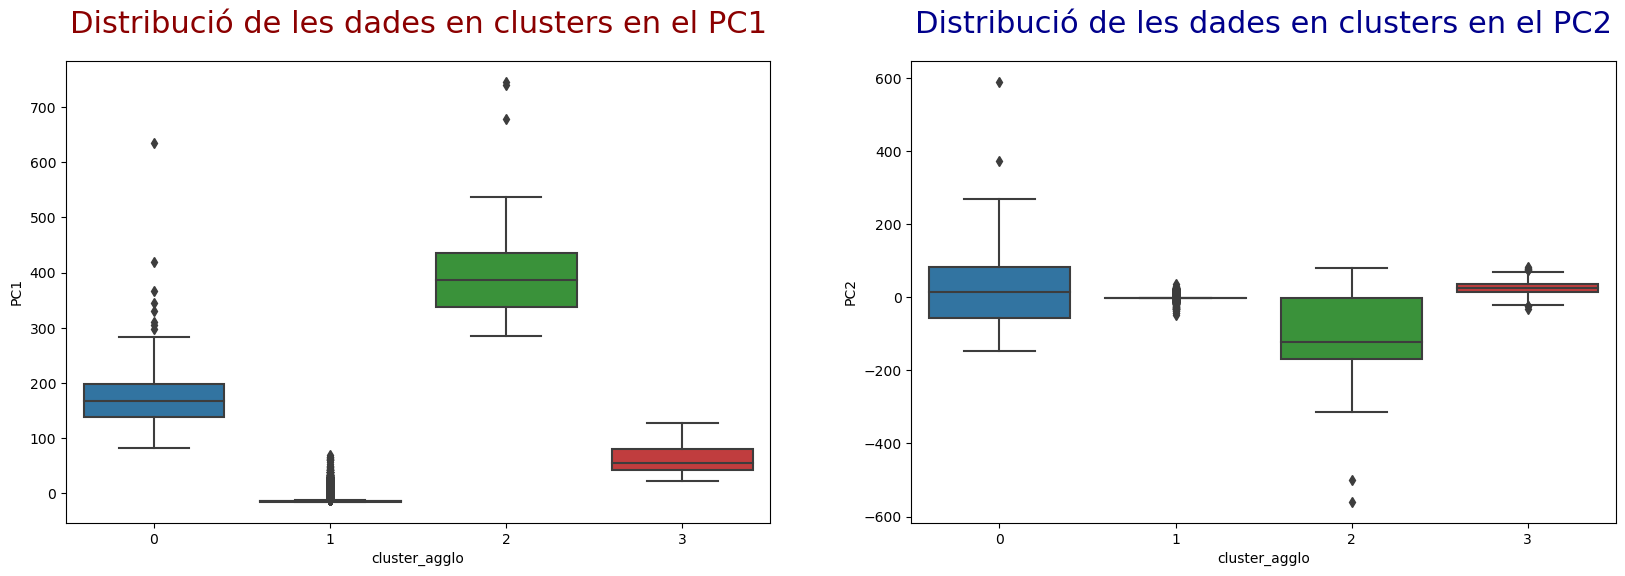

In [40]:
fb_thai[["PC1", "PC2"]] = fb_thai_pca

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(x='cluster_agglo', y="PC1", data=fb_thai, ax=axes[0])
sns.boxplot(x='cluster_agglo', y="PC2", data=fb_thai, ax=axes[1])

axes[0].set_title("Distribució de les dades en clusters en el PC1", fontsize=22, pad=20, color='darkred')
axes[1].set_title("Distribució de les dades en clusters en el PC2", fontsize=22, pad=20, color='darkblue')

**Conclusions Hierarchical clustering**   
<u>Númeriques</u>

1. **reactions** -> veiem que el cluster 1 es queda amb la gran majoria de les dades. Veiem que aquest cluster conté alguns outliers. Per altra banda la resta de clusters tenen molta densitat de dades i hi ha poca distància entre els punts. Si que en cluster 3 veiem un outlier molt allunyat de la resta, m'agradaria veure perquè l'ha classificat en el 3 i no a l'1. 

2. **comments** -> Veiem que el cluster dominant és el 0. Veiem que no trobem outliers en els clusters 0, 1, i 3 amb una gran densitat de punts el mateix rang de frequència. El cluster 0 es concentren els punts una mica més amunt (sembla just on acaben el 1 i el 3). Pel que fa el cluster 2, te molts pocs punts cosa que fa més evident que hi ha distancia entre els punts. Conté outliers.

3. **shares** -> els clusters 1 i 3 tenen molta densitat de data en la mateiza zona i no tenen outliers. Sembla que el cluster 1 és on s'agrupen els shares amb una frequencia més baixa. El cluster 2, torna a tenir molt poques instancies però sense gran distancia entre elles. En canvi, el cluster 0, que sembla que es el que recull més instancies, veiem que és l'unic amb outliers.

4. **likes** -> veiem que la distribució de les dades ens els clusters ens demostra que esta molt correlacionada amb reactions. Semblen idèntiques. 

5. **loves** -> No et sabria dir quin cluster te més instàncies si el 0 el 3. Ja que la distribució del 0 és allunyada i la 3 més densa. El cluster 1 torna a semblar que és el que agrupa les instancies amb menys frequencia i el 2 el que en te menys. Tots tenen outliers encara que sense gaire distancia amb els punts anteriors. 

6. **surprises** -> veiem que no recull moltes instàncies. Em dona al sensació que els clusters 0 i 3 es mostren d'una forma similar, només que el 0 te més agrupacions. El mateix em sembla identificar entre els clusters 1 i 2, en aquest cas amb major densitat en el 1. 

7. **laughs** -> Veiem que aqui el cluster 2 és l'unic que no te outliers i la menor agrupacio de els dades. El 0 i l'1 i el 3 tenen una distribució similar, molta densitat de la dada al principi amb outliers allunyats d'aquesta. El cluster 0 presenta mes instancies però en general no n'hi ha gaire.  

8. **sads** -> veiem que predomina lleugerament el cluster 1. Sembla ser que el 0 i 1 tenen una distribució més similar i el 2 i 3 també. Mentre que els dos primers presenten outliers molt allunyats els altres dos no. La densitat de la dada torna a ser entre 0 i 10 en tots els clusters. 

9. **agrys** -> Exceptuant el cluster 1 no tenen outliers. Veiem una densitat similar entre el 0 i 1 però com comentaba els punts en cluster 1 estan més allunyats. Els altres 3 clusters 0, 2 i 3 tenen una densitat entre 0 i 5. Hi ha molt poques instàncies.  

<u>Categoriques</u>   
Podem veure que el cluster 1 és on es recull la majoria de les dades en totes les variables. La distribució es similar a la de l'altre model (K-Means) però amb un cluster més. Per exemple, en la categoria type, veiem el mateix patró en que es concentra tota la data en el cluster 1 i en la resta de clusters només hi ha dada de videos. 
El cluster 2 clarament és el que te menys dades i normalment li falten la majoria del tipus de features.

En definitiva veiem que la distribució de les dades amb aquest model amb 4 clusters no dista molt de K-Means només que esta més dividida. 

Ens va molt bé per identificar correlacions i patrons alhora de vuere els gràfics. Personalment m'agradaria poder descubrir els motius d'agrupacions en clusters d'aquest patrons però això comportaria un analisi més a fons.

# Exercici 3

> Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [39]:
from sklearn.metrics import silhouette_score

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(fb_thai_pca, y_pred)
agglo_silhouette = silhouette_score(fb_thai_pca, labels)

# Print results
print("kmeans resultat:", kmeans_silhouette)
print("Hierarchical clustering resultat:", agglo_silhouette)

kmeans resultat: 0.8764459922001375
Hierarchical clustering resultat: 0.8579143886432754


Els resultats son molt similars pero ens dona una mica **millor kmeans amb 3 clusters** que el hierarchical clustering amb 4 clustes. Tot i això els dos resultats son superiors al 0.85.

Una bona comparació seria com es comporten els models sense utilitzar el PCA per veure si es millor el seu comportament o no, encara que no sabem el temps que tarda.